# Рекомендательные системы

## Пример для набора данных MovieLens

Набор данных включает в себя описание 5-звёздного рейтинга фильмов с сайта [MovieLens](http://movielens.org), одного из старейших сервисов по рекомендации фильмов. Набор данных содержит 25000095 оценок и 1093360 применений тэгов к 62423 фильмам. Эти данные были созданы 162541 пользователями в период с 9 января 1995 года по 21 ноября 2019 года, именно в этот день был сгенерирован датасет.

Пользователи были выбраны случайно, при условии, что пользователь оценил как минимум 20 фильмов. Демографическая информация в набор данных не включена. Каждый пользователь представлен только `id`.

Данные включают в себя файлы: `genome-scores.csv`, `genome-tags.csv`, `links.csv`, `movies.csv`, `ratings.csv` и `tags.csv`.

Они доступны для скачавания (как и другие даннее от GroupLens) по ссылке <http://grouplens.org/datasets/>.

Данные для лабораторной работы: https://grouplens.org/datasets/movielens/25m/

### Tags Data File Structure (tags.csv)
-----------------------------------

Все тэги содержаться в файле `tags.csv`. Каждая строка в файле представлена в формате:

    userId,movieId,tag,timestamp

Тэги - это сгенерированные пользователями метаданные о фильмах. Каждый тэг обычно представляет собой слово или коротку фразу. Значение, ценность и цель каждого тэга определяется каждым пользователем.

Таймстэмп (Timestamps) - это количество секунд, прошедших с 1 января 1970.

In [ ]:
tag=pd.read_csv('tags.csv')

In [ ]:
tag.sample(10)

,userId,movieId,tag,timestamp
776838,104147,41569,overrated,1137822760
59897,6550,2917,infidelity,1528559829
101048,6550,36276,paris,1528591936
1000056,147750,48394,twist ending,1337545521
1022195,151324,30810,stylized,1282398297
564379,63769,92259,disability,1452054377
530046,60081,5669,Michael Moore,1459308697
820009,113642,96728,Paul Thomas Anderson,1360518458
711182,92018,122882,violent,1525502275
1020787,150748,3676,dreamlike,1425920400


### Ratings Data File Structure (ratings.csv)
-----------------------------------------

Оценки пользователей за фильмы представлены в файле `ratings.csv`. Каждая строка записана в следующем формате:

    userId,movieId,rating,timestamp

Строки упорядочены по `userId`, а затем по `movieId`.

Рейтинги предствляют собой школу из 5 звёзд, с использованием половинки звезды (0.5 звёзд до 5.0 звёзд).

In [ ]:
rating=pd.read_csv('rating.csv')

In [ ]:
rating.sample(10)

,userId,movieId,rating,timestamp
13308677,86113,1101,4.0,1131426921
21542121,140051,380,2.5,1174462325
24682132,160387,480,3.0,835805226
24660636,160256,5526,3.0,1546818194
6935427,44998,539,4.0,965523318
19465131,126359,2067,4.0,1541570945
6873199,44594,531,5.0,1003874603
18783975,121817,2059,4.5,1527195707
21063531,136902,480,4.0,847670472
470676,3231,3330,2.0,957365709


In [ ]:
rating.shape

(25000095, 4)

In [ ]:
rating['userId'].value_counts().shape # посчитаем, сколько у нас пользователей

(162541,)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd76aa09550>]],
      dtype=object)

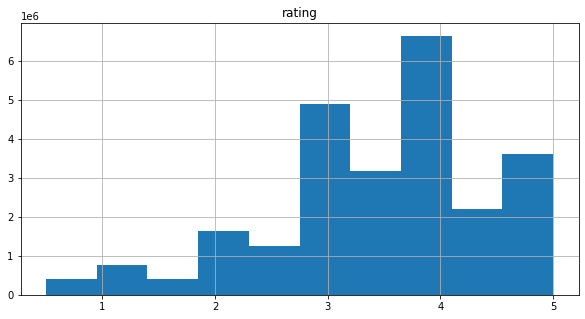

In [ ]:
rating.hist(column='rating', figsize=(10,5)) # гистограмма для рейтингов

### Movies Data File Structure (movies.csv)
---------------------------------------

Информация о фильмах содержится в файле `movies.csv`. Каждая строка представляет информацию об одном фильме в следующем формате:

    movieId,title,genres

Названия фильмов вводились вручную или были импортированы с сайта <https://www.themoviedb.org/>, в поле `title` после названия фильма в скобках указан год выпуска. В названиях могут быть ошибки.

Жанры фильма записываются в одном поле через разделитель |. Список допустимых жанров:

* Action
* Adventure
* Animation
* Children's
* Comedy
* Crime
* Documentary
* Drama
* Fantasy
* Film-Noir
* Horror
* Musical
* Mystery
* Romance
* Sci-Fi
* Thriller
* War
* Western
* (no genres listed)


### Links Data File Structure (links.csv)
---------------------------------------

Идентификаторы фильмов с других ресурсов содержатся в файле `links.csv`. Каждая строка представляет собой один фильм в следующем формате:

    movieId,imdbId,tmdbId

movieId - идентификатор фильма на <https://movielens.org>. Например, фильм Toy Story имеет ссылку <https://movielens.org/movies/1>.

imdbId - идентификатор фильма на <http://www.imdb.com>. Например, фильм Toy Story имеет ссылку <http://www.imdb.com/title/tt0114709/>.

tmdbId is - идентификатор фильма на <https://www.themoviedb.org>. Например, фильм Toy Story имеет ссылку <https://www.themoviedb.org/movie/862>.



In [ ]:
downloaded = drive.CreateFile({'id':"1kx_nH4Sv9h1h9fXoLN6531YZWsDxXqO-"})
downloaded.GetContentFile('links.csv')
link=pd.read_csv('links.csv')

In [ ]:
link[link.movieId == 1]

,movieId,imdbId,tmdbId
0,1,114709,862.0


## Данные для выполнения работы

Используйте неполный набор данных: 100K (ml-latest-small) или 1M (ml-1m)

https://grouplens.org/datasets/movielens/latest/

https://grouplens.org/datasets/movielens/1m/



In [ ]:
%%capture
!pip install plotly
import pandas as pd
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%%capture
!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip /content/ml-latest-small.zip

In [ ]:
movies_df = pd.read_csv("/content/ml-latest-small/movies.csv")
movies_df.sample(5)

,movieId,title,genres
4021,5684,Naqoyqatsi (2002),Documentary
4102,5879,Eight Crazy Nights (Adam Sandler's Eight Crazy...,Animation|Comedy|Musical
914,1213,Goodfellas (1990),Crime|Drama
5470,26183,Asterix and Cleopatra (Astérix et Cléopâtre) (...,Action|Adventure|Animation|Children|Comedy
7496,82854,Gulliver's Travels (2010),Adventure|Comedy|Fantasy


In [ ]:
ratings_df = pd.read_csv("/content/ml-latest-small/ratings.csv")
ratings_df["timestamp"] = pd.to_datetime(ratings_df.timestamp, unit='s')
ratings_df.sample(5)

,userId,movieId,rating,timestamp
7315,50,92046,3.0,2017-12-25 22:20:43
59255,387,153,3.0,2004-09-11 21:35:17
91792,596,1265,3.0,2018-09-01 18:42:59
10874,68,3275,3.5,2006-09-17 22:59:23
5267,34,27728,3.0,2006-12-18 17:44:22


In [ ]:
tags_df = pd.read_csv("/content/ml-latest-small/tags.csv")
tags_df["timestamp"] = pd.to_datetime(tags_df.timestamp, unit='s')
tags_df.sample(5)

,userId,movieId,tag,timestamp
869,424,4993,fantasy,2016-03-13 20:32:36
2602,477,4878,psychology,2009-05-16 17:21:09
2752,477,72998,superficial plot,2010-01-05 16:05:25
2133,474,6378,heist,2006-01-26 20:25:28
1109,474,425,Oscar (Best Actress),2006-01-23 18:20:34


In [ ]:
links_df = pd.read_csv("/content/ml-latest-small/links.csv")
links_df.sample(5)

,movieId,imdbId,tmdbId
3605,4952,89622,33525.0
684,902,54698,164.0
4802,7155,337909,8696.0
5449,26078,55728,17185.0
5532,26587,92337,NaN


# Задание 2.1

Сделать EDA. Например, посмотреть как менялась популярность тэгов со временем, сделать кластеризацию тэгов или кластеризацию фильмов. Посчитать разные статистики по тегам, жанрам, годам.

Нужно реализовать 3-4 визуализации.

## Посмотрим средний рейтинг фильмов, и выведем топ 10 фильмо с низким и высоким рейтингом, если фильм встречается более 20 раз. Если фильм оценили мало людей, то сложно сделать выводы

In [ ]:
movie_with_r_n = movies_df[["movieId", "title"]].merge(ratings_df[["movieId", "rating"]], on="movieId")[["title", "rating"]]
fig = px.histogram(movie_with_r_n, x='rating', title='Гистограмма оценок')
fig.show()

In [ ]:
movie_with_r_n = movies_df[["movieId", "title"]].merge(ratings_df[["movieId", "rating"]], on="movieId")[["title", "rating"]]
movie_count = movie_with_r_n.groupby("title").count()
movie_count = movie_count[movie_count.rating >= 20].reset_index()
movie_with_r_n = movie_with_r_n[movie_with_r_n.title.isin(movie_count.title)]

In [ ]:
# топ 10 худших фильмов
top_10_worst = movie_with_r_n.groupby("title").mean().nsmallest(10, "rating").reset_index()
top_10_worst

,title,rating
0,Anaconda (1997),1.925926
1,Godzilla (1998),1.954545
2,Super Mario Bros. (1993),2.000000
3,"Honey, I Blew Up the Kid (1992)",2.050000
4,Inspector Gadget (1999),2.095238
5,I Know What You Did Last Summer (1997),2.109375
6,Richie Rich (1994),2.200000
7,Wild Wild West (1999),2.207547
8,Batman & Robin (1997),2.214286
9,Superman III (1983),2.250000


In [ ]:
# топ 10 лучших фильмов
top_10_best = movie_with_r_n.groupby("title").mean().nlargest(10, "rating").reset_index()
top_10_best

,title,rating
0,"Streetcar Named Desire, A (1951)",4.475000
1,"Shawshank Redemption, The (1994)",4.429022
2,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.333333
3,"Philadelphia Story, The (1940)",4.310345
4,In the Name of the Father (1993),4.300000
5,Lawrence of Arabia (1962),4.300000
6,Hoop Dreams (1994),4.293103
7,"Godfather, The (1972)",4.289062
8,Harold and Maude (1971),4.288462
9,Logan (2017),4.280000


### Теперь посомтрим разбор оценок для топ 10 лучших и худших фильмов


In [ ]:
movie_with_r_n = movies_df[["movieId", "title"]].merge(ratings_df[["movieId", "rating"]], on="movieId")[["title", "rating"]]
fig = px.box(movie_with_r_n[movie_with_r_n.title.isin(top_10_best.title)], x='title', y='rating', title='Разброс оценок топ 10 лучших фильмов')
fig.show()

In [ ]:
movie_with_r_n = movies_df[["movieId", "title"]].merge(ratings_df[["movieId", "rating"]], on="movieId")[["title", "rating"]]
fig = px.box(movie_with_r_n[movie_with_r_n.title.isin(top_10_worst.title)], x='title', y='rating', title='Разброс оценок топ 10 худших фильмов')
fig.show()

## посмотрим на общее количество жанров

In [ ]:
movies_temp = movies_df.copy()

all_genres = np.array([])
for i in movies_temp.genres.values:
  all_genres = np.append(all_genres, i.split('|'))

genres_df = pd.DataFrame({"genres": all_genres})
genres_df.head()

,genres
0,Adventure
1,Animation
2,Children
3,Comedy
4,Fantasy


In [ ]:
fig = px.histogram(genres_df, title='Количество каждого жанра в выборке')
fig.show()

## Выведем самый популярный тэг по годам

Уникальные года

In [ ]:
np.unique(tags_df.timestamp.dt.year)

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018])

In [ ]:
tags_df_temp = tags_df.copy()
tags_df["year"] = tags_df.timestamp.dt.year
tags_df.sample(1)

,userId,movieId,tag,timestamp,year
1931,474,4600,doctors,2006-01-16 01:32:04,2006


In [ ]:
top_by_year = (
    tags_df.groupby(["year", "tag"]).count().reset_index().rename(columns={"userId": "count"})
    .sort_values(["year", "count"], ascending=[True, False])
    .groupby("year").head(1)
)

fig = px.bar(top_by_year, x="year", y="count", color="tag")
fig.show()

Из графика видно, что у нас очень много тэгов за 2006 год

## Кластеризация фильмов

Сделаем кластеризацию фильмов по жанру. Посмотрим на какие жанры произойдет разбиение. Буду использовать алгоритм DBSACN


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import DBSCAN

movies_temp = movies_df.copy()

vectorizer = CountVectorizer(tokenizer=lambda x: x.split('|'))
genres_matrix = vectorizer.fit_transform(movies_temp['genres'])

# Создание модели DBSCAN
# dbscan = DBSCAN(eps=0.5, min_samples=100, n_jobs=-1)
dbscan = DBSCAN(eps=0.5, min_samples=50, n_jobs=-1)
dbscan.fit(genres_matrix)

movies_temp['cluster'] = dbscan.labels_

labels = dbscan.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 26
Estimated number of noise points: 4240


Всего 26 кластеров, попробую посмотреть по каким принципам произошло разбиение. Для начала нужно убрать те фильмы, где алгоритм не определился с кластером

In [ ]:
movies_claster = movies_temp[movies_temp.cluster != -1][["genres", "cluster"]].reset_index(drop=True)
movies_claster = movies_claster.reset_index().groupby(["genres", "cluster"]).count().rename(columns={"index": "count"}).reset_index()
fig = px.bar(movies_claster, x = "genres", y='count', color='cluster',
                 title='Кластеризация фильмов по жанрам')
fig.show()

# Задание 2.2

Реалиизуйте рекомедацию фильмов конкретному пользователь - "User-based" подход (пользователя можно выбрать рандомно).

Для рассчета меры схожести используйте kNN и [cosine distance](https://medium.com/@milana.shxanukova15/cosine-distance-and-cosine-similarity-a5da0e4d9ded):



```
from sklearn.neighbors import NearestNeighbors

NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
```





## Получение данных

In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

In [ ]:
%%capture
!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip /content/ml-latest-small.zip

In [ ]:
ratings_df = pd.read_csv("/content/ml-latest-small/ratings.csv")
ratings_df = ratings_df.drop('timestamp', axis=1)
ratings_df.sample(5)

,userId,movieId,rating
46481,305,92507,4.0
16206,104,89904,4.0
81047,512,593,5.0
14392,91,2019,4.5
67668,438,786,3.0


In [ ]:
movies_df = pd.read_csv("/content/ml-latest-small/movies.csv")
movies_df.sample(5)

,movieId,title,genres
6784,60363,Zombie Strippers! (2008),Comedy|Horror
5905,33646,"Longest Yard, The (2005)",Comedy|Drama
3981,5614,"His Secret Life (a.k.a. Ignorant Fairies, The)...",Drama|Romance
6742,59306,Prom Night (2008),Horror|Mystery|Thriller
2895,3872,"Suddenly, Last Summer (1959)",Drama


## Формирование датасета

In [ ]:
user_based_dataset = ratings_df.pivot(index='userId', columns='movieId', values='rating')
user_based_dataset.fillna(0, inplace=True)
user_based_dataset.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
no_user_voted = ratings_df.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings_df.groupby('userId')['rating'].agg('count')

In [ ]:
user_based_dataset = user_based_dataset.loc[:, no_user_voted[no_user_voted > 10].index]
user_based_dataset = user_based_dataset.loc[no_movies_voted[no_movies_voted > 50].index, :]
user_based_dataset.head()

movieId,1,2,3,5,6,7,9,10,11,12,...,159093,164179,166528,168250,168252,174055,176371,177765,179819,187593
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,4.0,5.0,5.0,4.0,4.0,0.0,3.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
csr_ub_data = csr_matrix(user_based_dataset.values)
check_ub_dataset = user_based_dataset.copy()
check_ub_dataset.reset_index(inplace=True)
check_ub_dataset.head()

movieId,userId,1,2,3,5,6,7,9,10,11,...,159093,164179,166528,168250,168252,174055,176371,177765,179819,187593
0,1,4.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0.0,4.0,5.0,5.0,4.0,4.0,0.0,3.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Реализация User-based подхода

In [ ]:
ub_neigh = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
ub_neigh.fit(csr_ub_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [ ]:
def get_recommendations(user_id, n=20):
    # Берем n похожих пользователей
    user_ind = check_ub_dataset[check_ub_dataset['userId'] == user_id].index[0]
    distances, inds = ub_neigh.kneighbors(csr_ub_data[user_ind], n_neighbors=n)
    # Берем фильмы, которые пользователь смотрел
    cols = user_based_dataset.loc[user_id].index
    mask = user_based_dataset.loc[user_id].gt(0.).values
    user_movies = [cols[i] for i, x in enumerate(mask) if x]
    # Берем фильмы, которые смотрели похожие пользователи
    cols = check_ub_dataset.loc[inds[0]].columns.values
    mask = check_ub_dataset.loc[inds[0]].gt(0.).values
    movies_viewed_by_users = [cols[x].tolist()[1:] for x in mask]
    # Фильтруем фильмы и оставляем только уникальные
    viewed_movies = set()
    for movies_viewed_by_user in movies_viewed_by_users:
        viewed_movies.update(movies_viewed_by_user)
    # Берем фильмы, которые пользователь не смотрел
    new_movies = [viewed_movie for viewed_movie in viewed_movies if viewed_movie not in user_movies]
    # Подбираем рекомендации
    rec_movies = dict()
    # Рассматриваем новые фильмы
    for new_movie in new_movies:
        weighted_rating = 0.
        total_similarity = 0.
        # Рассматриваем каждого похожего пользователя
        for dist, ind in zip(distances[0], inds[0]):
            # Если похожий пользователь оценил рек. фильм, то считаем взвеш. оценку
            if check_ub_dataset.loc[ind, new_movie] != 0.:
                rating = check_ub_dataset.loc[ind, new_movie]
                weighted_rating += rating * (1 - dist)
                total_similarity += (1 - dist)

        # Если есть что предложить, то добавляем в словарь
        if total_similarity > 0.:
            movie = movies_df[movies_df['movieId'] == new_movie]['title'].values[0]
            rec_movies[movie] = weighted_rating / total_similarity

    # Сортируем и возвращаем рек. словарь фильмов и их взвеш. оценки
    rec_movies = dict(sorted(rec_movies.items(), reverse=True, key=lambda x: x[1]))
    rec_movies = {rec_movie_rating[0]: rec_movie_rating[1] for rec_movie_rating in list(rec_movies.items())[:n]}
    return rec_movies

In [ ]:
get_recommendations(1)

{'The Revenant (2015)': 5.0,
 'Eat Drink Man Woman (Yin shi nan nu) (1994)': 5.0,
 'Once Were Warriors (1994)': 5.0,
 'Three Colors: Red (Trois couleurs: Rouge) (1994)': 5.0,
 'Secret Life of Walter Mitty, The (2013)': 5.0,
 'In the Name of the Father (1993)': 5.0,
 "Once Upon a Time in the West (C'era una volta il West) (1968)": 5.0,
 'The Lego Movie (2014)': 5.0,
 'Yojimbo (1961)': 5.0,
 'My Neighbor Totoro (Tonari no Totoro) (1988)': 5.0,
 'Hannah and Her Sisters (1986)': 5.0,
 "Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)": 4.833468530051672,
 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964)': 4.776064224466068,
 'In Bruges (2008)': 4.758828851317676,
 'Dawn of the Dead (1978)': 4.7549500765043,
 '12 Angry Men (1957)': 4.752767312962446,
 'Strange Brew (1983)': 4.739501930466032,
 'Lawrence of Arabia (1962)': 4.6843162724986485,
 'Paths of Glory (1957)': 4.676698627049766,
 'Manhattan (1979)': 4.660823681699648}

Пример такой рекомендации:

https://www.analyticsvidhya.com/blog/2020/11/create-your-own-movie-movie-recommendation-system/

# Задание 2.3

По этим данным сделать рекомендацию на основе контента ("Item-based").
Рекомендуйте пользователю новые фильмы, на основе их близости к его самому любимому (высоко оцененному)  



Нужно представить ситуацию "холодного старта", когда у нас еще нет данных об оценках пользователей. Подумайте: на основе чего можно сделать рекомендацию фильмов в таком случае?

Например, можно использовать жанры фильмов и их рейтинг на imdb. Пример построенния такой рекомендации можно посмотреть по ссылке ниже:

https://github.com/jisilvia/kNN_Recommender_System/blob/main/kNN_Recommender_System.ipynb

ID фильмов в сервисе IMDB у вас уже есть в файле "links.csv". Для того, чтобы получить рейтинги, можно воспользоваться их наборами данных:

https://datasets.imdbws.com/

## Получение данных

In [ ]:
!wget https://datasets.imdbws.com/title.ratings.tsv.gz
!wget https://datasets.imdbws.com/title.basics.tsv.gz
!gzip -d title.ratings.tsv.gz
!gzip -d title.basics.tsv.gz

--2023-10-26 09:06:23--  https://datasets.imdbws.com/title.ratings.tsv.gz
Resolving datasets.imdbws.com (datasets.imdbws.com)... 99.84.160.101, 99.84.160.41, 99.84.160.94, ...
Connecting to datasets.imdbws.com (datasets.imdbws.com)|99.84.160.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6848630 (6.5M) [binary/octet-stream]
Saving to: ‘title.ratings.tsv.gz’

title.ratings.tsv.g 100%[===================>]   6.53M  --.-KB/s    in 0.1s    

2023-10-26 09:06:23 (64.4 MB/s) - ‘title.ratings.tsv.gz’ saved [6848630/6848630]

--2023-10-26 09:06:23--  https://datasets.imdbws.com/title.basics.tsv.gz
Resolving datasets.imdbws.com (datasets.imdbws.com)... 99.84.160.101, 99.84.160.41, 99.84.160.94, ...
Connecting to datasets.imdbws.com (datasets.imdbws.com)|99.84.160.101|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 179319996 (171M) [binary/octet-stream]
Saving to: ‘title.basics.tsv.gz’

title.basics.tsv.gz 100%[===================>] 171.01

In [ ]:
imdb_ratings = pd.read_csv("title.ratings.tsv", sep = '\t', low_memory=False)
imdb_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2003
1,tt0000002,5.8,269
2,tt0000003,6.5,1898
3,tt0000004,5.5,178
4,tt0000005,6.2,2682


In [ ]:
imdb_basics = pd.read_csv("title.basics.tsv", sep = '\t', low_memory=False)
imdb_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


## Формирование датасета

### IMDB

In [ ]:
def transform_dataset(df):
    # Удаляем лишнии колонки и None жанры
    drop_cols = ['titleType', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes']
    df = df[df['titleType'] == 'movie'].drop(columns=drop_cols)
    df = df[df['genres'] != '\\N']
    # Берем жанры
    genres = np.unique(df['genres'])
    uniq_genre = np.array([])
    for mix_genre in genres:
        uniq_genre = np.append(uniq_genre, mix_genre.split(','))

    uniq_genre = np.unique(uniq_genre)
    # Добавляем столбцы жанров
    df[uniq_genre] = np.zeros((len(imdb_basics), len(uniq_genre)))
    # Заполняем столбцы жанров
    for genre in uniq_genre:
        df.loc[df['genres'].str.contains(genre), genre] = 1.
    # Удаляем излишний столбец жанров
    return df.drop(columns=['genres'])

In [ ]:
imdb_basics = transform_dataset(imdb_basics)
imdb_basics.head()

,tconst,primaryTitle,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
8,tt0000009,Miss Jerry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144,tt0000147,The Corbett-Fitzsimmons Fight,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
570,tt0000574,The Story of the Kelly Gang,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
587,tt0000591,The Prodigal Son,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
610,tt0000615,Robbery Under Arms,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Добавляем в датасет оценки и удаляем строки с None значениями
imdb_basics['averageRating'] = imdb_ratings['averageRating']
imdb_basics = imdb_basics.dropna()
imdb_basics.head()

,tconst,primaryTitle,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western,averageRating
8,tt0000009,Miss Jerry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.3
144,tt0000147,The Corbett-Fitzsimmons Fight,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.3
570,tt0000574,The Story of the Kelly Gang,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
587,tt0000591,The Prodigal Son,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.6
610,tt0000615,Robbery Under Arms,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.8


### MovieLens

In [ ]:
item_based_dataset = ratings_df.pivot(index='movieId',columns='userId',values='rating')
item_based_dataset.fillna(0, inplace=True)
item_based_dataset.head()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
no_user_voted = ratings_df.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings_df.groupby('userId')['rating'].agg('count')

In [ ]:
item_based_dataset = item_based_dataset.loc[no_user_voted[no_user_voted > 10].index, :]
item_based_dataset = item_based_dataset.loc[:, no_movies_voted[no_movies_voted > 50].index]
item_based_dataset.head()

userId,1,4,6,7,10,11,15,16,17,18,...,600,601,602,603,604,605,606,607,608,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,3.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0


In [ ]:
csr_ib_data = csr_matrix(item_based_dataset.values)
check_ib_dataset = item_based_dataset.copy()
check_ib_dataset.reset_index(inplace=True)
check_ib_dataset.head()

userId,movieId,1,4,6,7,10,11,15,16,17,...,600,601,602,603,604,605,606,607,608,610
0,1,4.0,0.0,0.0,4.5,0.0,0.0,2.5,0.0,4.5,...,2.5,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,5.0
1,2,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0
2,3,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
3,5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.5,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
4,6,4.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,...,0.0,0.0,3.0,4.0,3.0,0.0,0.0,0.0,0.0,5.0


## Реализация Item-based подхода

In [ ]:
ib_neigh = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
ib_neigh.fit(csr_ib_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [ ]:
imdb_features = imdb_basics.drop(['tconst', 'primaryTitle'], axis=1)

imdb_neigh = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=5, n_jobs=-1)
imdb_neigh.fit(imdb_features.values)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1)

In [ ]:
def get_recommendations_by_movie(n=20, best_movie=None):
    # Если не переданы парметры фильма, то рекомендуем по лучшему в рейтинге
    if best_movie is None:
        best_movie = [imdb_basics.iloc[np.argmax(imdb_basics['averageRating'])][2:].values]

    # Находим похожие фильмы
    distances, inds = imdb_neigh.kneighbors(best_movie, n_neighbors=n)
    # Формируем словарь рекомендаций
    rec_movies = dict()
    for dist, ind in zip(distances[0], inds[0]):
        rec_movies[imdb_basics.iloc[ind]['primaryTitle']] = imdb_basics.iloc[ind]['averageRating'] * (1 -dist)

    rec_movies = dict(sorted(rec_movies.items(), reverse=True, key=lambda x: x[1]))
    return rec_movies

In [ ]:
def get_recommendations(user_id, n=20, best_movie=None):
    # Берем любимый фильм пользователя
    favourite_movie_ind = np.argmax(item_based_dataset[user_id].values)
    rating = check_ib_dataset.loc[favourite_movie_ind, user_id]
    # Если есть любимый фильм, то ищем похожие
    if rating:
        distances, inds = ib_neigh.kneighbors(csr_ib_data[favourite_movie_ind], n_neighbors=n)
        weighted_ratings = rating * (1 - distances[0])
        # Берем фильмы пользователя
        cols = user_based_dataset.loc[:, user_id].index
        mask = user_based_dataset.loc[:, user_id].gt(0.).values
        user_movies = [cols[i] for i, x in enumerate(mask) if x]
        # Формируем рекомендации, исключаем фильмы, которые уже смотрел пользователь
        rec_movies = dict()
        for weighted_rating, ind in zip(weighted_ratings, inds[0]):
            if ind not in user_movies:
                movie_id = check_ib_dataset.loc[ind]['movieId']
                movie_name = movies_df[movies_df['movieId'] == movie_id]['title'].values[0]
                rec_movies[movie_name] = weighted_rating

        rec_movies = dict(sorted(rec_movies.items(), reverse=True, key=lambda x: x[1]))
        return rec_movies
    else:  # Если нет любимого фильма, то рекомендуем из рейтинга
        return get_recommendations_by_movie(n, best_movie)

In [ ]:
get_recommendations(1)

{'Seven (a.k.a. Se7en) (1995)': 5.0,
 'Fight Club (1999)': 3.2931713560236764,
 'Usual Suspects, The (1995)': 3.256870242326895,
 'Reservoir Dogs (1992)': 3.202104238874183,
 'Matrix, The (1999)': 3.179493298411294,
 'Braveheart (1995)': 3.139877827057313,
 'American History X (1998)': 3.1169664317675028,
 'Fargo (1996)': 3.0603266072140887,
 'American Beauty (1999)': 3.04533271572404,
 'Kill Bill: Vol. 1 (2003)': 3.012453176488021,
 'Memento (2000)': 2.9736394844267506,
 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)': 2.9732083021326283,
 'Star Wars: Episode IV - A New Hope (1977)': 2.9332980790673178}

In [ ]:
get_recommendations_by_movie()

{'Too Young to Know': 10.0,
 'The Very Thought of You': 9.399460562965228,
 'This Is My Moon': 9.299258389498124,
 'The Teacher with the Blonde Hair': 9.299258389498124,
 'Genesung': 9.199021541158533,
 'Checkpoint': 8.99843953184783,
 'See You in the Next War': 8.797705522736775,
 'Un balcon en forêt': 8.697278499748776,
 'Prince Sun and Princess Moon': 8.697278499748776,
 'Sati Padmini': 8.596809754842967,
 "Hungary's Revival": 8.596809754842967,
 'Twin Sisters': 8.596809754842967,
 'Die letzte Nacht': 8.496297939091246,
 'Panaghóy sa subâ: The Call of the River': 8.496297939091246,
 'Strayed': 8.39574164698645,
 'Lancieri di Savoia': 8.39574164698645,
 'Asylum': 8.39574164698645,
 'Digmaan ng damdamin': 8.39574164698645,
 'Noche sin cielo': 8.39574164698645,
 'Luba': 8.295139413585376}